In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import argparse
from tueplots import bundles
from tueplots.constants.color import rgb
import matplotlib.dates as mdates

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 150})
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Adjust the following paths to your own
CHARTS_PATH = "../../dataset/charts_processed.csv"
FEATURE_PATH = "../../dataset/audio_features_processed.csv"

In [164]:
charts_df = pd.read_csv(CHARTS_PATH)
features_df = pd.read_csv(FEATURE_PATH)

In [79]:
charts_df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [80]:
features_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,id
0,0.18700,0.852,195840,0.773,0.000030,8,0.1590,-2.921,0,0.0776,102.034,4,0.907,6mICuAdrwEjh6Y6lroV2Kg
1,0.00431,0.663,259196,0.920,0.000017,11,0.1010,-4.070,0,0.2260,99.935,4,0.533,7DM4BPaS7uofFul3ywMe46
2,0.40000,0.761,222560,0.838,0.000000,4,0.1760,-3.073,0,0.0502,93.974,4,0.710,3AEZUABDXNtecAOSC1qTfo
3,0.55100,0.508,205600,0.687,0.000003,0,0.1260,-4.361,1,0.3260,180.044,4,0.555,6rQSrBHf7HlZjtcMZ4S4bO
4,0.07600,0.899,234320,0.626,0.000000,6,0.0631,-4.228,0,0.2920,88.007,4,0.873,58IL315gMSTD37DOZPJ2hf


In [66]:
def retrieve_yearly_data(df, year):
    """
    Retrieve the data for a given year
    """
    return df.loc[df['year'] == year]

def retrieve_monthly_data(df, year, month):
    """
    Retrieve the data for a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month)]

def retrieve_daily_data(df, year, month, day):
    """
    Retrieve the data for a given day of a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month) & (df['day'] == day)]

2021 Germany Analysis of Correlation Between Artists and Features

In [88]:
df_country = charts_df.loc[charts_df['region'] == "Germany"]
df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
df_country = df_country.loc[df_country['year'] == 2021]
df_country

,title,rank,date,artist,url,region,chart,trend,streams,year,month,day
14431365,Sommergewitter,1,2021-07-01,Pashanim,https://open.spotify.com/track/2H7jZg2HliuQhZj...,Germany,top200,SAME_POSITION,873752.0,2021,7,1
14431366,Beggin',2,2021-07-01,Måneskin,https://open.spotify.com/track/3Wrjm47oTz2sjIg...,Germany,top200,SAME_POSITION,608090.0,2021,7,1
14431367,I WANNA BE YOUR SLAVE,3,2021-07-01,Måneskin,https://open.spotify.com/track/4pt5fDVTg5GhEvE...,Germany,top200,SAME_POSITION,472752.0,2021,7,1
14431368,good 4 u,4,2021-07-01,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,Germany,top200,SAME_POSITION,464431.0,2021,7,1
14431369,Bad Habits,5,2021-07-01,Ed Sheeran,https://open.spotify.com/track/6PQ88X9TkUIAUIZ...,Germany,top200,SAME_POSITION,392851.0,2021,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26170977,Heroine,46,2021-07-31,Dutch Disorder,https://open.spotify.com/track/6N2rMGXBhNZ6slx...,Germany,viral50,SAME_POSITION,NaN,2021,7,31
26170978,Immer wenn ich gehen will,47,2021-07-31,"Montez, ELIF",https://open.spotify.com/track/478gRiu00kpBFi9...,Germany,viral50,NEW_ENTRY,NaN,2021,7,31
26170979,61 Grad,48,2021-07-31,"Endzone, TM",https://open.spotify.com/track/5Z7J2Au61uO7K1Z...,Germany,viral50,NEW_ENTRY,NaN,2021,7,31
26170980,Wrecked,49,2021-07-31,Imagine Dragons,https://open.spotify.com/track/2d1MywHy6FwKdzx...,Germany,viral50,MOVE_UP,NaN,2021,7,31


In [89]:
# replace url with track id
df_country['url'] = df_country['url'].str.split('/').str[-1]
df_country = df_country.merge(features_df, left_on='url', right_on='id')
df_country

,title,rank,date,artist,url,region,chart,trend,streams,year,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,id
0,Sommergewitter,1,2021-07-01,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,SAME_POSITION,873752.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
1,Sommergewitter,2,2021-07-02,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,MOVE_DOWN,908665.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
2,Sommergewitter,1,2021-07-03,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,MOVE_UP,831747.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
3,Sommergewitter,1,2021-07-04,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,SAME_POSITION,696470.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
4,Sommergewitter,1,2021-07-05,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,SAME_POSITION,831282.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85023,Bul Beni,49,2021-07-30,Ezhel,1riBwVUqVsk5RGJ9iLN8cG,Germany,viral50,NEW_ENTRY,NaN,2021,...,0.00000,6,0.102,-7.862,0,0.2680,104.001,4,0.348,1riBwVUqVsk5RGJ9iLN8cG
85024,Bul Beni,50,2021-07-31,Ezhel,1riBwVUqVsk5RGJ9iLN8cG,Germany,viral50,MOVE_DOWN,NaN,2021,...,0.00000,6,0.102,-7.862,0,0.2680,104.001,4,0.348,1riBwVUqVsk5RGJ9iLN8cG
85025,Your Sister Was Right,44,2021-07-28,Wilbur Soot,5BNAzE37hmpyCx0hyrgDqJ,Germany,viral50,NEW_ENTRY,NaN,2021,...,0.10800,2,0.129,-16.502,1,0.0772,83.729,4,0.150,5BNAzE37hmpyCx0hyrgDqJ
85026,Your Sister Was Right,49,2021-07-29,Wilbur Soot,5BNAzE37hmpyCx0hyrgDqJ,Germany,viral50,MOVE_DOWN,NaN,2021,...,0.10800,2,0.129,-16.502,1,0.0772,83.729,4,0.150,5BNAzE37hmpyCx0hyrgDqJ


In [96]:
# group according to artist, song and track id
features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence']
ft = features_df[features]
ft


,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.852,0.773,-2.921,0,0.0776,0.18700,0.000030,0.1590,0.9070
1,0.663,0.920,-4.070,0,0.2260,0.00431,0.000017,0.1010,0.5330
2,0.761,0.838,-3.073,0,0.0502,0.40000,0.000000,0.1760,0.7100
3,0.508,0.687,-4.361,1,0.3260,0.55100,0.000003,0.1260,0.5550
4,0.899,0.626,-4.228,0,0.2920,0.07600,0.000000,0.0631,0.8730
...,...,...,...,...,...,...,...,...,...
217686,0.658,0.761,-6.436,1,0.0349,0.34800,0.079400,0.1090,0.2620
217687,0.165,0.619,-10.219,0,0.0402,0.10400,0.000000,0.0950,0.2990
217688,0.562,0.484,-7.254,1,0.0319,0.64000,0.000000,0.3010,0.4150
217689,0.641,0.561,-9.485,0,0.0353,0.43900,0.000016,0.1070,0.8220


In [97]:
features_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,id
0,0.18700,0.852,195840,0.773,0.000030,8,0.1590,-2.921,0,0.0776,102.034,4,0.9070,6mICuAdrwEjh6Y6lroV2Kg
1,0.00431,0.663,259196,0.920,0.000017,11,0.1010,-4.070,0,0.2260,99.935,4,0.5330,7DM4BPaS7uofFul3ywMe46
2,0.40000,0.761,222560,0.838,0.000000,4,0.1760,-3.073,0,0.0502,93.974,4,0.7100,3AEZUABDXNtecAOSC1qTfo
3,0.55100,0.508,205600,0.687,0.000003,0,0.1260,-4.361,1,0.3260,180.044,4,0.5550,6rQSrBHf7HlZjtcMZ4S4bO
4,0.07600,0.899,234320,0.626,0.000000,6,0.0631,-4.228,0,0.2920,88.007,4,0.8730,58IL315gMSTD37DOZPJ2hf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217686,0.34800,0.658,255775,0.761,0.079400,1,0.1090,-6.436,1,0.0349,115.962,4,0.2620,3W7x967esdawMwzvMsPmEs
217687,0.10400,0.165,507069,0.619,0.000000,5,0.0950,-10.219,0,0.0402,83.447,4,0.2990,4Cw36mfQ1z4JnjFOEtX4hP
217688,0.64000,0.562,246087,0.484,0.000000,10,0.3010,-7.254,1,0.0319,137.990,4,0.4150,02jBlxoKmrSXrHECUIqoeD
217689,0.43900,0.641,260533,0.561,0.000016,11,0.1070,-9.485,0,0.0353,79.007,3,0.8220,4JaLSvGiHdm4RK8Nj9dpbg


In [91]:
# encode strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_country['artist'] = le.fit_transform(df_country['artist'])
df_country['title'] = le.fit_transform(df_country['title'])
df_country['url'] = le.fit_transform(df_country['url'])
df_country

,artist,title,url,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,counts
0,0,2482,1759,0.837,0.555,-7.860,1,0.0773,0.56500,0.000000,0.1130,0.841,21
1,1,2802,3058,0.902,0.509,-9.352,0,0.1500,0.36500,0.000000,0.1250,0.479,1
2,2,1680,3222,0.737,0.526,-13.669,0,0.0873,0.10100,0.000000,0.0850,0.074,40
3,3,3,1249,0.792,0.511,-6.876,1,0.0409,0.12400,0.000090,0.1400,0.111,9
4,4,1612,439,0.643,0.939,-3.967,1,0.0463,0.10400,0.000000,0.8810,0.756,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,1749,402,1647,0.767,0.531,-7.720,0,0.0347,0.38000,0.070800,0.0943,0.684,11
3273,1750,2884,242,0.941,0.384,-12.783,1,0.1600,0.17400,0.015200,0.0930,0.517,39
3274,1751,2876,546,0.668,0.910,-3.377,0,0.2450,0.22000,0.000000,0.0631,0.837,25
3275,1752,2890,1167,0.761,0.735,-6.428,0,0.1800,0.11600,0.000000,0.2830,0.799,33


In [92]:
df_country.drop(['counts'], axis=1, inplace=True)

In [ ]:
features_df.drop(['id'], axis=1, inplace=True)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

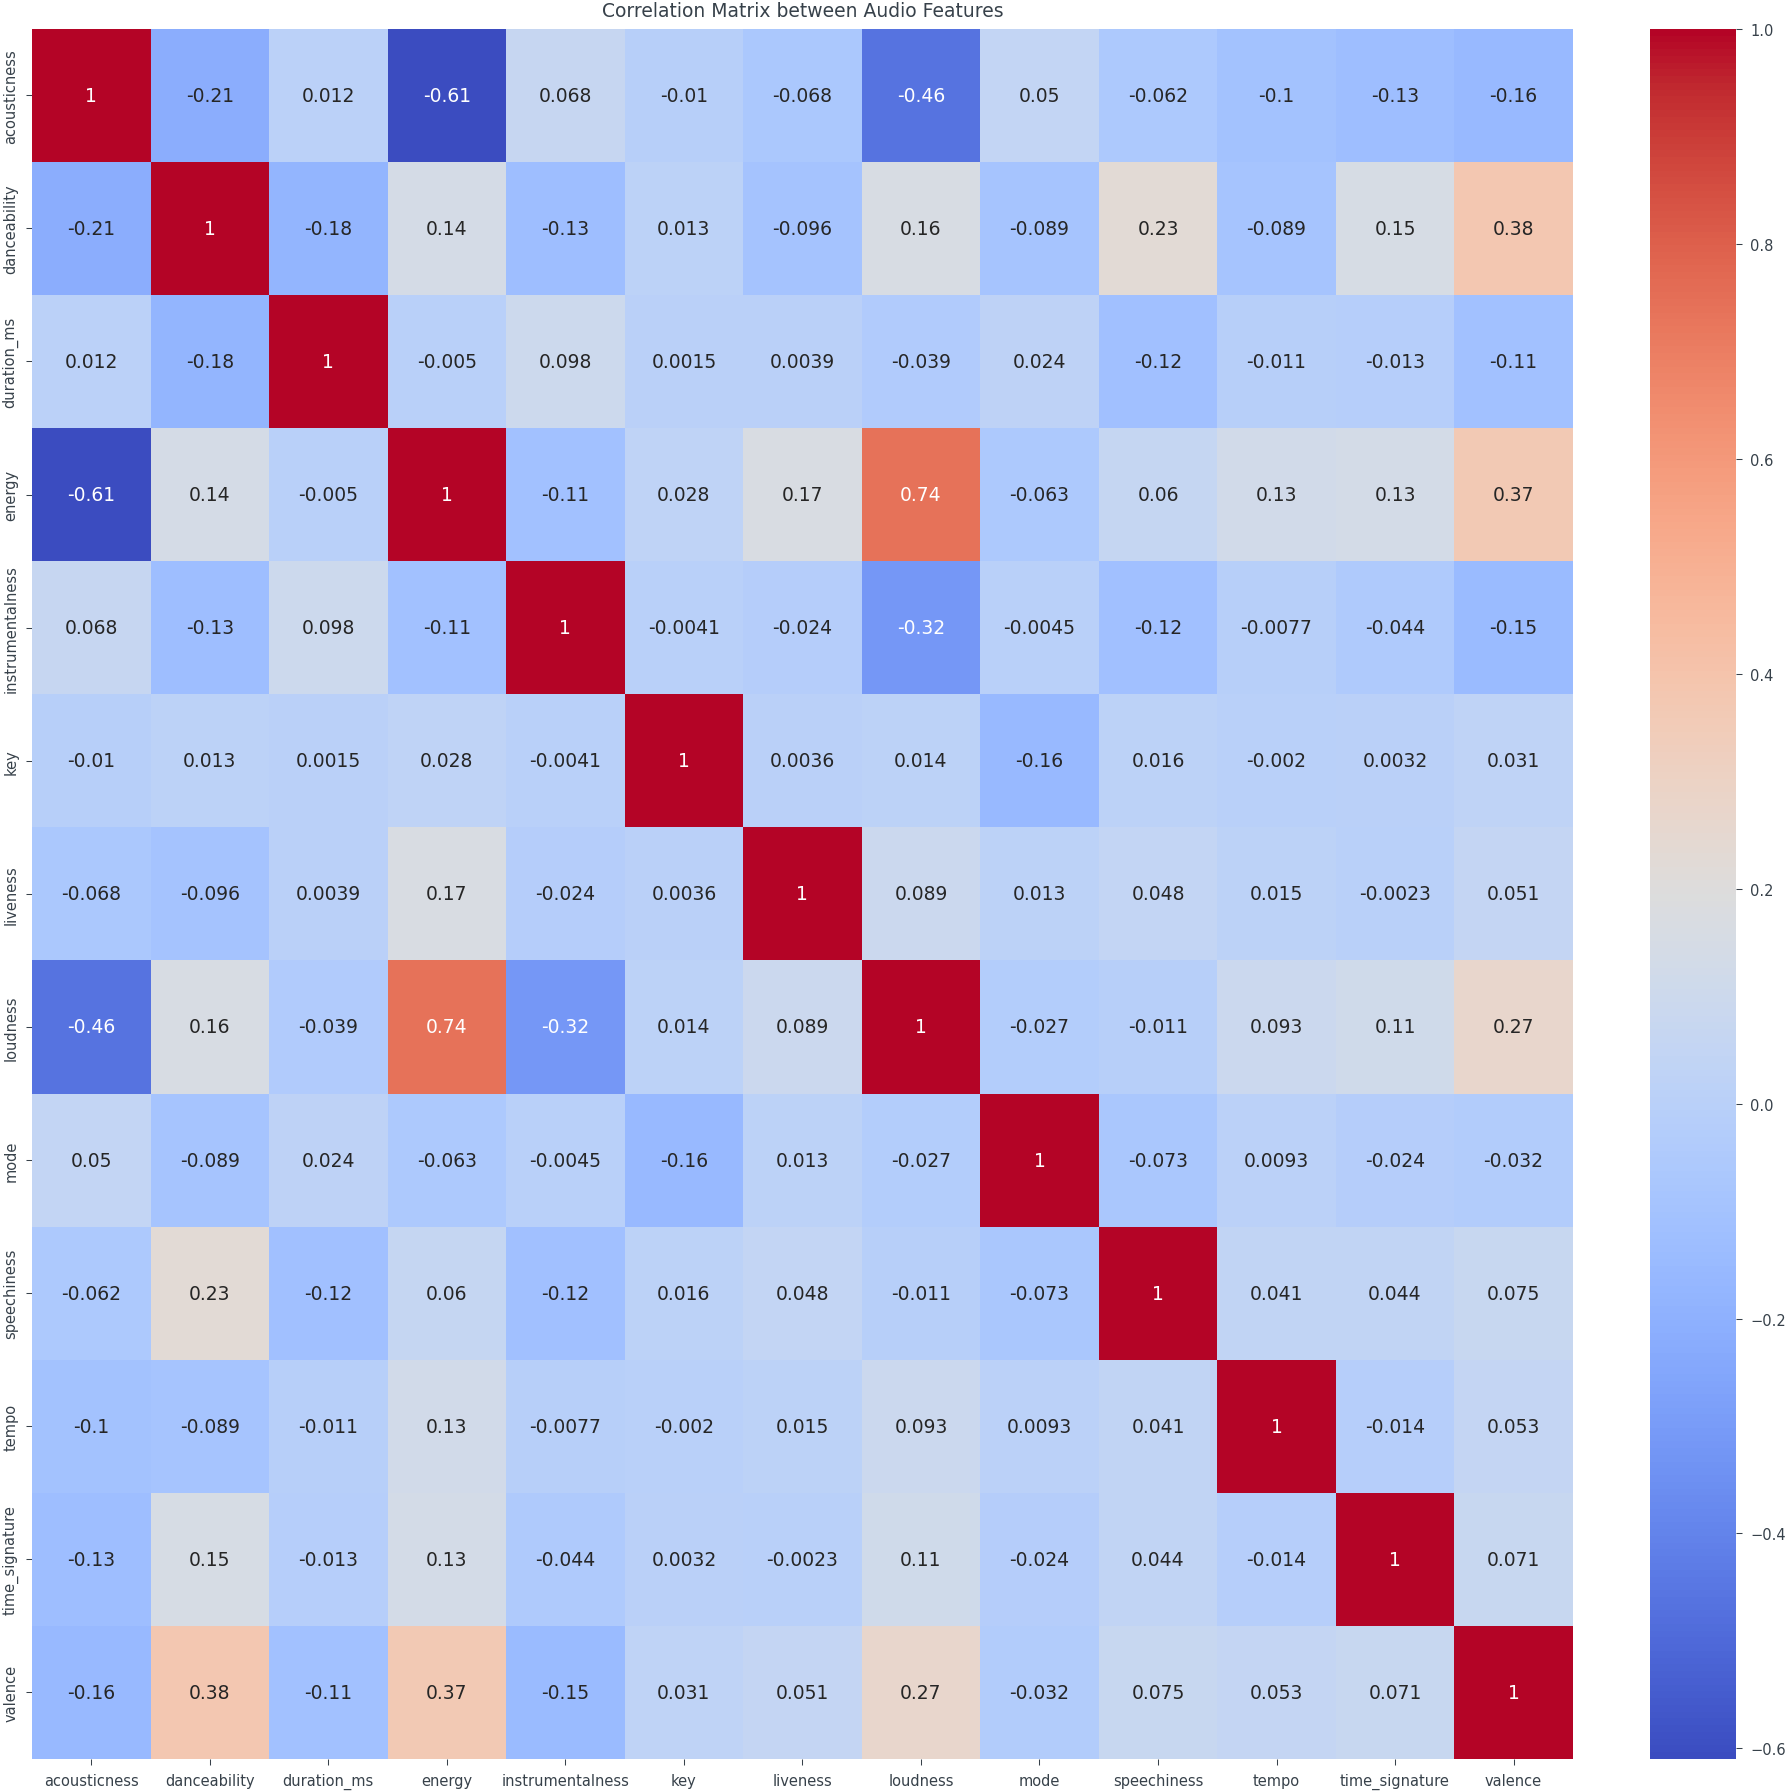

In [103]:
# plot correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 12))
plt.title('Correlation Matrix between Audio Features')
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [106]:
countries = charts_df['region'].unique()

In [118]:
df_country = charts_df.loc[charts_df['region'] == "Germany"]
df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
df_country = df_country.loc[df_country['year'] == 2021]
df_country['url'] = df_country['url'].str.split('/').str[-1]
df_country = df_country.merge(features_df, left_on='url', right_on='id')

df_country

,title,rank,date,artist,url,region,chart,trend,streams,year,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,id
0,Sommergewitter,1,2021-07-01,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,SAME_POSITION,873752.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
1,Sommergewitter,2,2021-07-02,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,MOVE_DOWN,908665.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
2,Sommergewitter,1,2021-07-03,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,MOVE_UP,831747.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
3,Sommergewitter,1,2021-07-04,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,SAME_POSITION,696470.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
4,Sommergewitter,1,2021-07-05,Pashanim,2H7jZg2HliuQhZjfBblLrZ,Germany,top200,SAME_POSITION,831282.0,2021,...,0.00094,11,0.112,-10.569,0,0.1010,91.996,4,0.721,2H7jZg2HliuQhZjfBblLrZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85023,Bul Beni,49,2021-07-30,Ezhel,1riBwVUqVsk5RGJ9iLN8cG,Germany,viral50,NEW_ENTRY,NaN,2021,...,0.00000,6,0.102,-7.862,0,0.2680,104.001,4,0.348,1riBwVUqVsk5RGJ9iLN8cG
85024,Bul Beni,50,2021-07-31,Ezhel,1riBwVUqVsk5RGJ9iLN8cG,Germany,viral50,MOVE_DOWN,NaN,2021,...,0.00000,6,0.102,-7.862,0,0.2680,104.001,4,0.348,1riBwVUqVsk5RGJ9iLN8cG
85025,Your Sister Was Right,44,2021-07-28,Wilbur Soot,5BNAzE37hmpyCx0hyrgDqJ,Germany,viral50,NEW_ENTRY,NaN,2021,...,0.10800,2,0.129,-16.502,1,0.0772,83.729,4,0.150,5BNAzE37hmpyCx0hyrgDqJ
85026,Your Sister Was Right,49,2021-07-29,Wilbur Soot,5BNAzE37hmpyCx0hyrgDqJ,Germany,viral50,MOVE_DOWN,NaN,2021,...,0.10800,2,0.129,-16.502,1,0.0772,83.729,4,0.150,5BNAzE37hmpyCx0hyrgDqJ


In [119]:
feature = "energy"
# for each unique day, get the mean of the feature
df_country = df_country.groupby('date').apply(lambda x: x[feature].mean())
df_country

date
2021-01-01    0.670076
2021-01-02    0.647964
2021-01-03    0.645442
2021-01-04    0.652280
2021-01-05    0.650192
                ...   
2021-12-27    0.638060
2021-12-28    0.633140
2021-12-29    0.620320
2021-12-30    0.621740
2021-12-31    0.660480
Length: 365, dtype: float64

In [159]:
def plot_average_feature_daily(charts_df, features_df, country, year, feature):
    df_country = charts_df.loc[charts_df['region'] == country]
    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    df_country = df_country.loc[df_country['year'] == year]
    df_country['url'] = df_country['url'].str.split('/').str[-1]
    df_country = df_country.merge(features_df, left_on='url', right_on='id')

    # for each unique day, get the mean of the feature
    feature_daily_mean = df_country.groupby('date').apply(lambda x: x[feature].mean())
    # get standard deviation daily
    # feature_daily_std = df_country.groupby('date').apply(lambda x: x[feature].std())
    x = feature_daily_mean.index
    y = feature_daily_mean.values

    # plot the feature over time
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average value of " + feature)
    # plt.fill_between(y, y+std, y-std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    ax.set_xlabel("days")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylim([0.5, 0.8])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_red, linewidth=0.3)
    plt.title("Daily average energy of the top-200 in " + country + " in " + str(year))
    plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

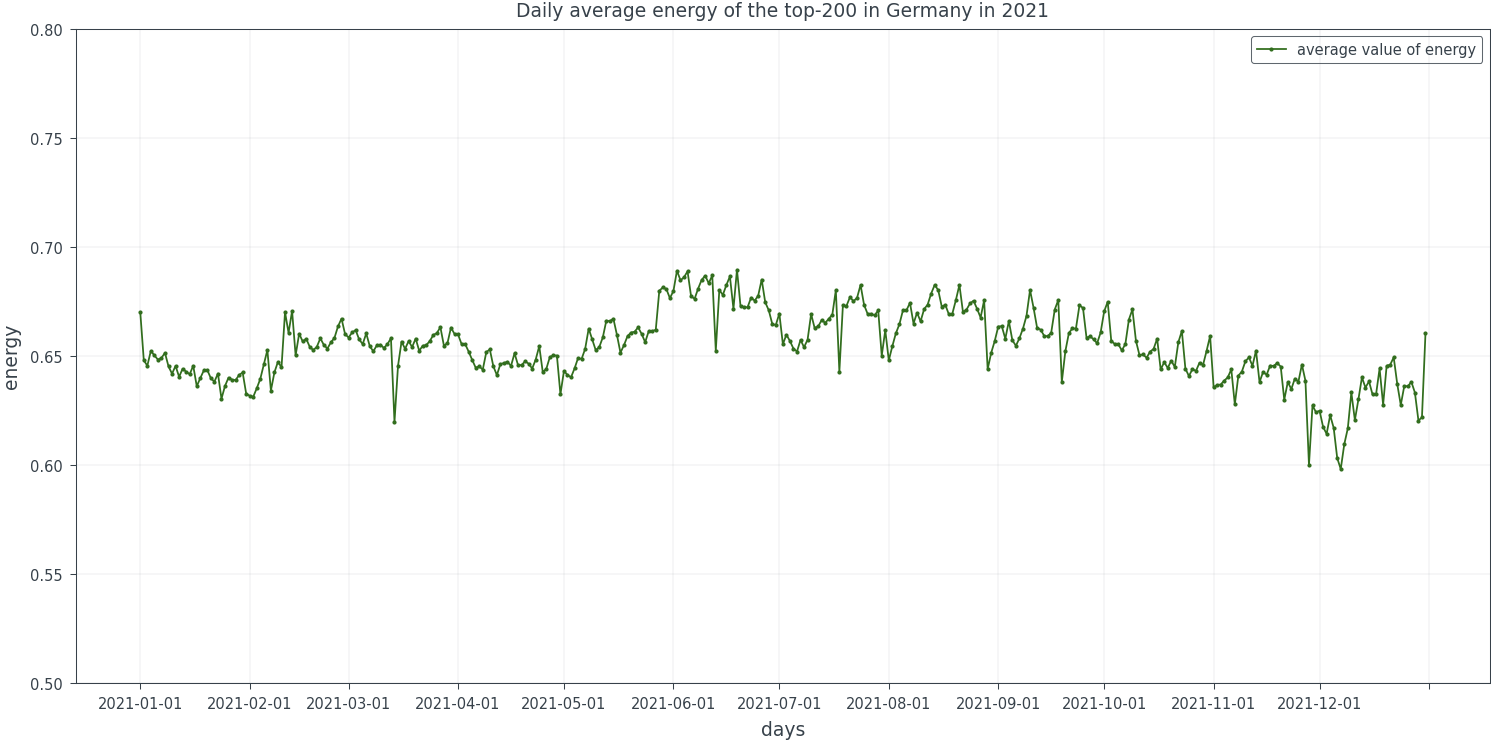

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

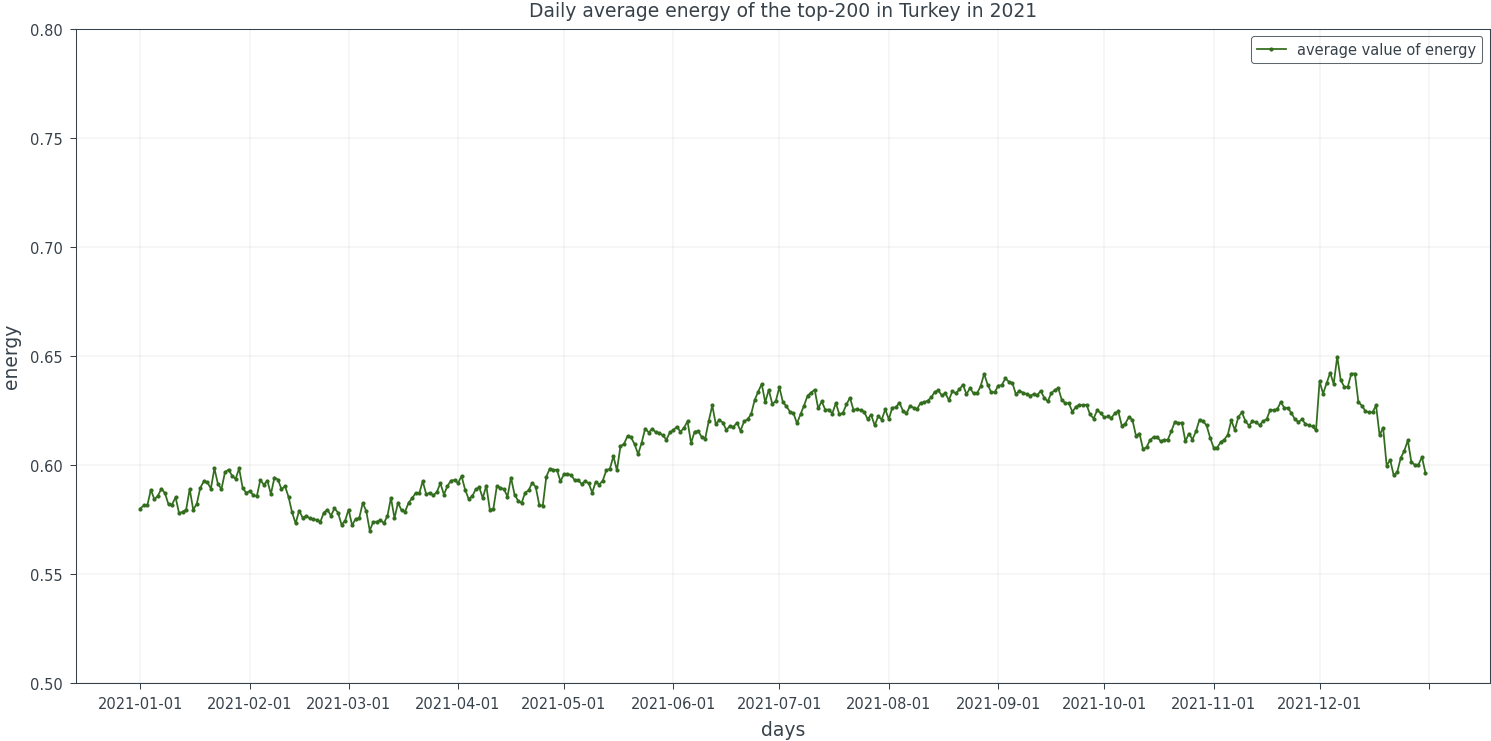

In [160]:
plot_average_feature_daily(charts_df, features_df, "Germany", 2021, "energy")

In [165]:
def compare_average_feature_daily_countries(charts_df, features_df, country1, country2, year, feature):
    def get_country_data(df, country):
        df_country = df.loc[df['region'] == country]
        df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
        df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
        df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
        df_country = df_country.loc[df_country['year'] == year]
        df_country['url'] = df_country['url'].str.split('/').str[-1]
        df_country = df_country.merge(features_df, left_on='url', right_on='id')
        return df_country
    
    df_country1 = get_country_data(charts_df, country1)
    df_country2 = get_country_data(charts_df, country2)

    # for each unique day, get the mean of the feature
    feature_daily_mean_country1 = df_country1.groupby('date').apply(lambda x: x[feature].mean())
    feature_daily_mean_country2 = df_country2.groupby('date').apply(lambda x: x[feature].mean())

    # do the same thing as above but with two countries
    x = feature_daily_mean_country1.index
    y1 = feature_daily_mean_country1.values
    y2 = feature_daily_mean_country2.values
    
    # plot the feature over time
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y1, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average value of " + feature + " in " + country1)
    ax.plot(x, y2, '.-', ms=2, lw=0.85, color=rgb.tue_red, label="average value of " + feature + " in " + country2)
    # plt.fill_between(y, y+std, y-std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    ax.set_xlabel("days")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylim([0.5, 0.8])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_red, linewidth=0.3)
    plt.title("Daily average energy of the top-200 in " + country1 + " and " + country2 + " in " + str(year))
    plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

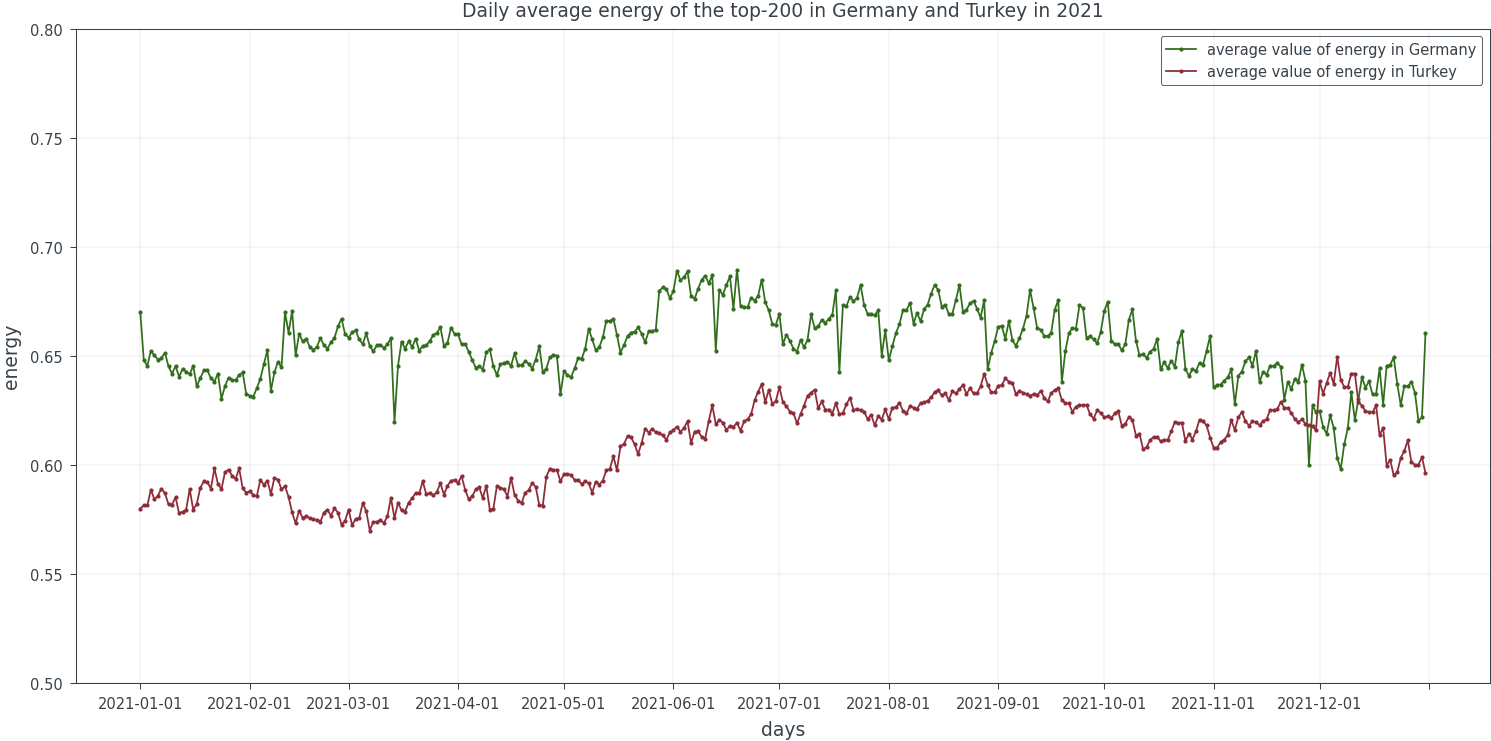

In [166]:
compare_average_feature_daily_countries(charts_df, features_df, "Germany", "Turkey", 2021, "energy")

In [224]:
def compare_average_feature_daily_countries(charts_df, features_df, country1, country2, feature):
    def get_country_data(df, country):
        df_country = df.loc[df['region'] == country]
        df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
        df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
        df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
        df_country['url'] = df_country['url'].str.split('/').str[-1]
        df_country = df_country.merge(features_df, left_on='url', right_on='id')
        return df_country
    
    df_country1 = get_country_data(charts_df, country1)
    df_country2 = get_country_data(charts_df, country2)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)


    country1_data = []
    country2_data = []
    for y in range(2017, 2022):
        # for 2020 drop 28th of February
        df_country1_year = df_country1.loc[df_country1['year'] == y]
        df_country2_year = df_country2.loc[df_country2['year'] == y]
        if y == 2020:
            # drop month = 2 day = 28
            df_country1_year = df_country1_year.loc[(df_country1_year['month'] != 2) | (df_country1_year['day'] != 28)]
            df_country2_year = df_country2_year.loc[(df_country2_year['month'] != 2) | (df_country2_year['day'] != 28)]

        # for each unique day, get the mean of the feature
        feature_daily_mean_country1 = df_country1_year.groupby('date').apply(lambda x: x[feature].mean())
        feature_daily_mean_country2 = df_country2_year.groupby('date').apply(lambda x: x[feature].mean())

        # do the same thing as above but with two countries
        x = feature_daily_mean_country1.index
        y1 = feature_daily_mean_country1.values
        y2 = feature_daily_mean_country2.values
        # replace year with 2021:
        x = [str(y) + "-" + str(x)[5:] for x in x]

        # ms: width of the dots
        # lw: width of the line
        country1_data.append((x, y1))
        country2_data.append((x, y2))
        # plt.fill_between(y, y+std, y-std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    
    x = country1_data[0][0]
    for i in range(len(country1_data)):
        year = i + 2017
        ax.plot(x, country1_data[i][1], '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, alpha =(year - 2017) / (2022 - 2017),label=country1 + " in " + str(year))
    for i in range(len(country2_data)):
        year = i + 2017
        ax.plot(x, country2_data[i][1], '.-', ms=2, lw=0.85, color=rgb.tue_red, alpha =(year - 2017) / (2022 - 2017), label= country2 + " in " + str(year))
    
    ax.set_xlabel("days")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")
    
    # get rid of years from dates
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
  
    ax.grid(True)
    ax.set_ylim([0.5, 0.8])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_red, linewidth=0.3)
    plt.title("Daily average " + feature + " of the top-200 in " + country1 + " and " + country2)
    plt.show()
    

In [226]:
# get unique countries
countries = charts_df['region'].unique()
countries

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

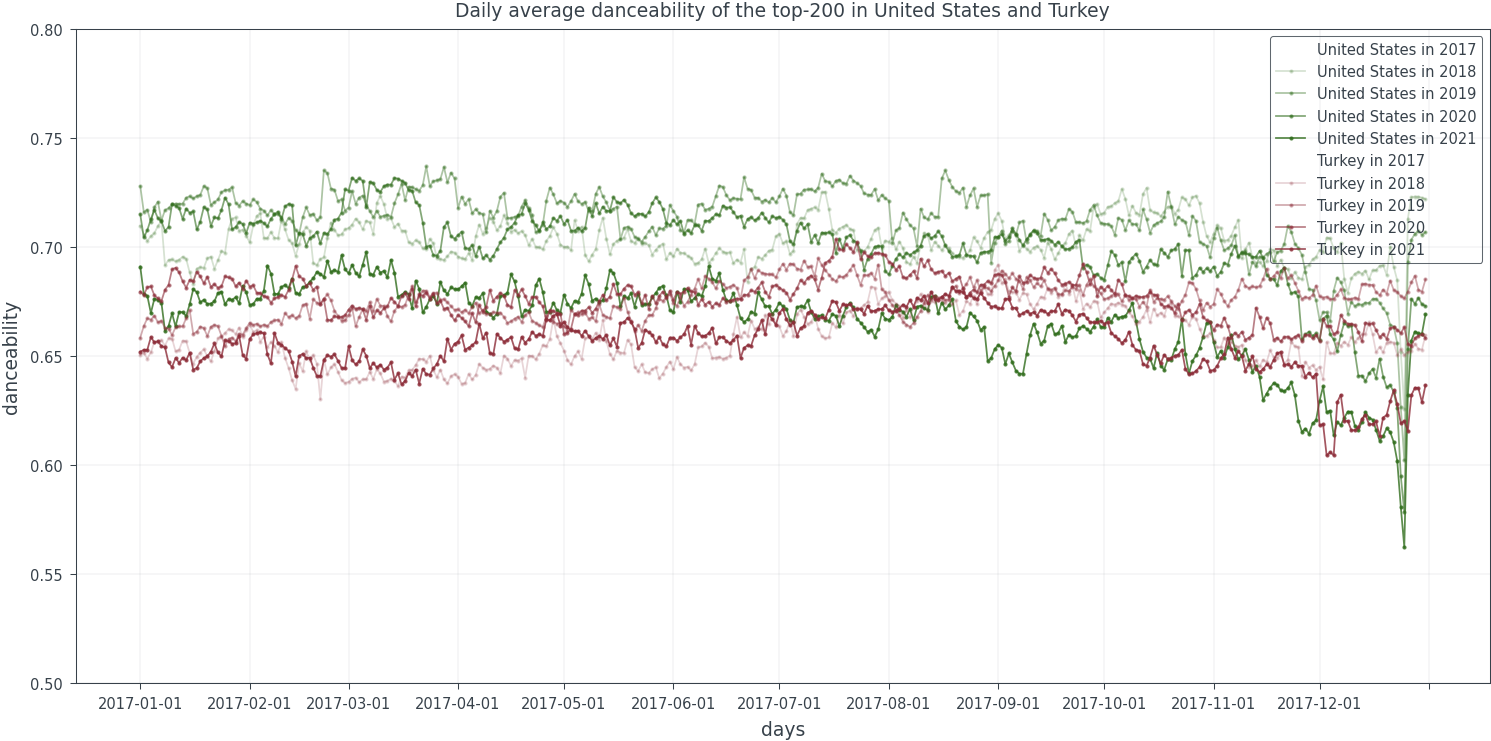

In [229]:
compare_average_feature_daily_countries(charts_df, features_df, "United States", "Turkey", "danceability")